<h1>Esto es para Eitan</h1>

usar nbdime para hacer merges en el codigo con github

<h2>Fase 1: Business Understanding</h2>



El banco Monopoly lleva muchos años atendiendo a sus clientes en Chile y recientemente ha sido adquirido por un Banco con capitales extranjeros llamado “Dormammu”. Dormammu nos ha encargado hacer estudios sobre los clientes del banco Monopoly, para conocer su comportamiento y detectar patrones. Además, debemos analizar cómo será su estrategia para abordar estos nuevos clientes dado el uso que ellos hacen de sus productos financieros.

Nuestro objetivo es analizar su base de datos, limpiarla, seleccionar las variables que sirvan para alguna interpretación y entregar la mayor información posible a los dueños de este banco para que puedan conocer a los clientes, preparar una estrategia y abordar a este nuevo mercado.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif

#%matplotlib inline

In [2]:
MONOPOLY_XLSX ='Base_clientes_Monopoly.xlsx'
MONOPOLY_CSV ='Base_clientes_Monopoly_otro.csv'

In [3]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [4]:
df = pd.read_excel(MONOPOLY_XLSX)
df.head(10)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0.0,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.0,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.0,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0.0,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,0.0,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0
5,6,170,H,13.0,47,707664.0,67,1,1,0,...,0.0,35800,0.0,35800.0,0.0,0.0,51197,0.0,R,0
6,7,811,H,13.0,48,1022833.0,21,1,0,1,...,0.0,9391,0.0,8818.0,0.0,8818.0,0,0.0,T,0
7,8,170,H,13.0,46,NaN,69,0,1,1,...,0.0,6000,0.0,283520.0,0.0,283520.0,0,0.0,R,0
8,9,170,H,13.0,49,1171066.0,33,0,0,0,...,0.0,60000,0.0,507629.0,0.0,507629.0,0,0.0,R,1
9,10,170,M,13.0,44,964387.0,23,1,1,0,...,0.0,92583,0.0,65487.0,0.0,65487.0,12084,0.0,R,0


<h2>Fase 2: Data Understanding</h2>


<h3>Variables elegidas</h3>


- Region ______________________________| Región de Residencia
- Renta _______________________________| Renta del cliente
- Edad ________________________________| Edad del cliente
- Sexo ________________________________| Sexo del cliente
- Adicional ___________________________| Indicador de Tenecia de TC adicionales
- Consumo _____________________________| Indicador de Crédito de Consumo
- Cuentas _____________________________| Número de cuentas que tiene el cliente
- Monoproducto ________________________| Indicador de si el cliente es solo poseedor de una TC
- TC __________________________________| Número de Tarjeta de crédito que tiene el cliente
- Internauta___________________________| Indicador de cliente Internauta que usa la web Monopoly
- Dualidad ____________________________| Indicador de Dualidad (Cliente es dual si tiene 2 o mas TC)
- CUPO_L1 _____________________________| Cupo de la tarjeta crédito para compras nacionales
- CUPO_MX _____________________________| Cupo de la tarjeta crédito para compras internacionales
- FlgActCOL_T12 _______________________| Indicador de actividad en avances en cuotas con tasa en el mes X en la TC
- Txs_T12 _____________________________| Número de transacciones realizados por el cliente en TC en el mes X
- FacCCOT_T12__________________________| Monto facturado en compras en cuotas con tasa por el cliente en TC en el mes X
- PagoInt_T12 _________________________| Monto de pagos de deuda internacional del cliente en el mes X
- PagoNac_T12 _________________________| Monto de pagos de deuda nacional del cliente en el mes X

<h3>Variable creada</h3>

- Paga_cuentas

Las variables region, edad y sexo fueron elegidas porque nos permiten segmentar a los clientes en base a características demográficas fundamentales.
Las variables renta, consumo, cuentas, monoproducto, TC, internauta y dualidad fueron elegidas porque nos permiten analizar el comportamiento financiero de los clientes.
Las variables CUPO_L1, CUPO_MX, FlgActCOL_TX, Txs_TX y FacCCOT_TX fueron elegidas porque nos permiten evaluar el riesgo de crédito y el uso de los productos de crédito

En resumen, la selección de estas variables se basa en la idea de que, para analizar bien el comportamiento de los clientes de tarjetas de crédito, es importante considerar tanto aspectos demográficos y socioeconómicos como el uso que le dan a la tarjeta. Al combinar estos datos, se puede tener una mejor visión del cliente y crear estrategias de marketing y abordar este mercado de mejor manera.

Para modelo de clasificacion queremos ver si el cliente paga o no paga sus deudas

In [5]:
df_monopoly = (df[['Region', 'Renta', 'Edad','Sexo', 'Adicional','Consumo', 'Cuentas', 'Monoproducto' , 'TC', 'Dualidad', 'CUPO_L1', 'CUPO_MX', 'FlgActCOL_T12', 'FlgActCOL_T11', 'FlgActCOL_T10', 'FlgActCOL_T09', 'FlgActCOL_T08', 'FlgActCOL_T07', 'FlgActCOL_T06','FlgActCOL_T05','FlgActCOL_T04' ,'FlgActCOL_T03', 'FlgActCOL_T02', 'FlgActCOL_T01', 'Txs_T12', 'Txs_T11', 'Txs_T10', 'Txs_T09', 'Txs_T08', 'Txs_T07', 'Txs_T06', 'Txs_T05', 'Txs_T04', 'Txs_T03', 'Txs_T02', 'Txs_T01', 'FacCCOT_T12', 'FacCCOT_T11', 'FacCCOT_T10', 'FacCCOT_T09', 'FacCCOT_T08', 'FacCCOT_T07', 'FacCCOT_T06', 'FacCCOT_T05', 'FacCCOT_T04', 'FacCCOT_T03', 'FacCCOT_T02', 'FacCCOT_T01', 'PagoInt_T12', 'PagoInt_T11', 'PagoInt_T10', 'PagoInt_T09', 'PagoInt_T08', 'PagoInt_T07', 'PagoInt_T06', 'PagoInt_T05', 'PagoInt_T04', 'PagoInt_T03', 'PagoInt_T02', 'PagoInt_T01', 'PagoNac_T12', 'PagoNac_T11', 'PagoNac_T10', 'PagoNac_T09', 'PagoNac_T08', 'PagoNac_T07', 'PagoNac_T06', 'PagoNac_T05', 'PagoNac_T04', 'PagoNac_T03', 'PagoNac_T02', 'PagoNac_T01' ]])
df_monopoly

,Region,Renta,Edad,Sexo,Adicional,Consumo,Cuentas,Monoproducto,TC,Dualidad,...,PagoNac_T10,PagoNac_T09,PagoNac_T08,PagoNac_T07,PagoNac_T06,PagoNac_T05,PagoNac_T04,PagoNac_T03,PagoNac_T02,PagoNac_T01
0,13.0,NaN,43,M,1,0,1,0,3,0,...,23000.0,24000.0,25000.0,26000.0,36000.0,50000.0,39000.0,41000.0,33000.0,33000
1,13.0,143640.0,46,H,0,0,1,0,1,0,...,194000.0,221000.0,180000.0,200000.0,100000.0,200000.0,200000.0,0.0,14000.0,300000
2,13.0,929106.0,45,H,1,0,1,0,2,0,...,14850.0,45890.0,0.0,60886.0,124289.0,69822.0,54138.0,0.0,25189.0,216676
3,13.0,172447.0,46,H,1,0,1,1,2,0,...,40000.0,60000.0,60000.0,45000.0,60000.0,50000.0,60000.0,60000.0,60000.0,60000
4,13.0,805250.0,46,H,1,0,2,0,3,1,...,301404.0,272969.0,435450.0,431776.0,386774.0,301860.0,246171.0,220811.0,143686.0,272925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,13.0,364978.0,51,H,1,0,2,0,3,1,...,80000.0,85000.0,0.0,80000.0,155000.0,0.0,83000.0,0.0,50000.0,300000
51120,13.0,625376.0,51,H,0,0,1,0,1,0,...,35454.0,45711.0,10336.0,0.0,346717.0,159171.0,76775.0,169661.0,173162.0,166098
51121,13.0,806220.0,47,H,1,0,1,0,2,0,...,10000.0,110298.0,0.0,0.0,13092.0,13123.0,17283.0,26700.0,14700.0,18891
51122,13.0,NaN,47,M,0,0,1,0,1,0,...,0.0,0.0,47510.0,42031.0,46256.0,35158.0,18959.0,61173.0,25460.0,26528


In [7]:
# Calculando la suma de pagos de los últimos 12 meses
df_monopoly['Total_Pagos_Deuda'] = df_monopoly[['PagoInt_T12', 'PagoInt_T11', 'PagoInt_T10', 'PagoInt_T09', 'PagoInt_T08', 'PagoInt_T07', 'PagoInt_T06', 'PagoInt_T05', 'PagoInt_T04', 'PagoInt_T03', 'PagoInt_T02', 'PagoInt_T01', 'PagoNac_T12', 'PagoNac_T11', 'PagoNac_T10', 'PagoNac_T09', 'PagoNac_T08', 'PagoNac_T07', 'PagoNac_T06', 'PagoNac_T05', 'PagoNac_T04', 'PagoNac_T03', 'PagoNac_T02', 'PagoNac_T01']].sum(axis=1)

# Definiendo un umbral de pago (por ejemplo, 90% de las facturas)
df_monopoly['Total_Facturas'] =  0.9 * df_monopoly[['FacCCOT_T12', 'FacCCOT_T11', 'FacCCOT_T10', 'FacCCOT_T09', 'FacCCOT_T08', 'FacCCOT_T07', 'FacCCOT_T06', 'FacCCOT_T05', 'FacCCOT_T04', 'FacCCOT_T03', 'FacCCOT_T02', 'FacCCOT_T01']].sum(axis=1)

df_monopoly['Paga_al_dia'] = df_monopoly['Total_Pagos_Deuda'] >= df_monopoly['Total_Facturas']
df_monopoly['Paga_al_dia'] = df_monopoly['Paga_al_dia'].astype(int)


#Otra manera de hacerlo como ayuda para futuro:

#df_monopoly['Paga_al_dia'] = 0
#df_monopoly.loc[df_monopoly['total_pago'] >= umbral, 'Paga_al_dia'] = 1

df_monopoly

C:\Users\Eitan\AppData\Local\Temp\ipykernel_1324\7704396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monopoly['Total_Pagos_Deuda'] = df_monopoly[['PagoInt_T12', 'PagoInt_T11', 'PagoInt_T10', 'PagoInt_T09', 'PagoInt_T08', 'PagoInt_T07', 'PagoInt_T06', 'PagoInt_T05', 'PagoInt_T04', 'PagoInt_T03', 'PagoInt_T02', 'PagoInt_T01', 'PagoNac_T12', 'PagoNac_T11', 'PagoNac_T10', 'PagoNac_T09', 'PagoNac_T08', 'PagoNac_T07', 'PagoNac_T06', 'PagoNac_T05', 'PagoNac_T04', 'PagoNac_T03', 'PagoNac_T02', 'PagoNac_T01']].sum(axis=1)
C:\Users\Eitan\AppData\Local\Temp\ipykernel_1324\7704396.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,Region,Renta,Edad,Sexo,Adicional,Consumo,Cuentas,Monoproducto,TC,Dualidad,...,PagoNac_T07,PagoNac_T06,PagoNac_T05,PagoNac_T04,PagoNac_T03,PagoNac_T02,PagoNac_T01,Total_Pagos_Deuda,Total_Facturas,Paga_al_dia
0,13.0,NaN,43,M,1,0,1,0,3,0,...,26000.0,36000.0,50000.0,39000.0,41000.0,33000.0,33000,352000.0,69776.1,1
1,13.0,143640.0,46,H,0,0,1,0,1,0,...,200000.0,100000.0,200000.0,200000.0,0.0,14000.0,300000,2009000.0,96300.0,1
2,13.0,929106.0,45,H,1,0,1,0,2,0,...,60886.0,124289.0,69822.0,54138.0,0.0,25189.0,216676,819909.0,0.0,1
3,13.0,172447.0,46,H,1,0,1,1,2,0,...,45000.0,60000.0,50000.0,60000.0,60000.0,60000.0,60000,685000.0,11691.0,1
4,13.0,805250.0,46,H,1,0,2,0,3,1,...,431776.0,386774.0,301860.0,246171.0,220811.0,143686.0,272925,3495806.0,42300.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,13.0,364978.0,51,H,1,0,2,0,3,1,...,80000.0,155000.0,0.0,83000.0,0.0,50000.0,300000,958000.0,8910.0,1
51120,13.0,625376.0,51,H,0,0,1,0,1,0,...,0.0,346717.0,159171.0,76775.0,169661.0,173162.0,166098,1236737.0,629991.0,1
51121,13.0,806220.0,47,H,1,0,1,0,2,0,...,0.0,13092.0,13123.0,17283.0,26700.0,14700.0,18891,304087.0,58706.1,1
51122,13.0,NaN,47,M,0,0,1,0,1,0,...,42031.0,46256.0,35158.0,18959.0,61173.0,25460.0,26528,303075.0,0.0,1


In [ ]:
var_continuas = (df_monopoly[['Renta', 'CUPO_L1', 'CUPO_MX', 'FlgActCOL_T12', 'FlgActCOL_T11', 'FlgActCOL_T10', 'FlgActCOL_T09', 'FlgActCOL_T08', 'FlgActCOL_T07', 'FlgActCOL_T06','FlgActCOL_T05','FlgActCOL_T04' ,'FlgActCOL_T03', 'FlgActCOL_T02', 'FlgActCOL_T01', 'Txs_T12', 'Txs_T11', 'Txs_T10', 'Txs_T09', 'Txs_T08', 'Txs_T07', 'Txs_T06', 'Txs_T05', 'Txs_T04', 'Txs_T03', 'Txs_T02', 'Txs_T01', 'FacCCOT_T12', 'FacCCOT_T11', 'FacCCOT_T10', 'FacCCOT_T09', 'FacCCOT_T08', 'FacCCOT_T07', 'FacCCOT_T06', 'FacCCOT_T05', 'FacCCOT_T04', 'FacCCOT_T03', 'FacCCOT_T02', 'FacCCOT_T01', 'PagoInt_T12', 'PagoInt_T11', 'PagoInt_T10', 'PagoInt_T09', 'PagoInt_T08', 'PagoInt_T07', 'PagoInt_T06', 'PagoInt_T05', 'PagoInt_T04', 'PagoInt_T03', 'PagoInt_T02', 'PagoInt_T01', 'PagoNac_T12', 'PagoNac_T11', 'PagoNac_T10', 'PagoNac_T09', 'PagoNac_T08', 'PagoNac_T07', 'PagoNac_T06', 'PagoNac_T05', 'PagoNac_T04', 'PagoNac_T03', 'PagoNac_T02', 'PagoNac_T01' ]])

var_discretas = (df_monopoly[['Edad', 'Cuentas', 'TC']])

var_nominales = (df_monopoly[['Sexo', 'Adicional', 'Consumo', 'Monoproducto', 'Dualidad', 'Paga_al_dia']])

var_ordinales = (df_monopoly[['Region']])

In [ ]:
from pandas_profiling import ProfileReport


profile = ProfileReport(df_monopoly, title='Monopoly_Report')
#profile.to_file(output_file='Monopoly_Report.html')
profile

Dento de las correlaciones podemos ver una alta correlacion entre:
- CUPO_L1 con CUPO_MX, lo que quiere decir que si el cupo de compras nacionales suele ser alto el internacional también lo será.
- Edad con CUPO_L1, lo quiere decir que mientras mayor sea uno mayor cupo máximo tendrá en sus tarjetas de crédito

In [9]:
print(df_monopoly.shape)
print(df_monopoly.dtypes)
print(df_monopoly.info())

(51124, 72)
Region         float64
Renta          float64
Edad             int64
Sexo            object
Adicional        int64
                ...   
PagoNac_T05    float64
PagoNac_T04    float64
PagoNac_T03    float64
PagoNac_T02    float64
PagoNac_T01      int64
Length: 72, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         51071 non-null  float64
 1   Renta          37759 non-null  float64
 2   Edad           51124 non-null  int64  
 3   Sexo           51123 non-null  object 
 4   Adicional      51124 non-null  int64  
 5   Consumo        51124 non-null  int64  
 6   Cuentas        51124 non-null  int64  
 7   Monoproducto   51124 non-null  int64  
 8   TC             51124 non-null  int64  
 9   Dualidad       51124 non-null  int64  
 10  CUPO_L1        51124 non-null  int64  
 11  CUPO_MX        51124 no

In [10]:
var_continuas.describe()

,Renta,CUPO_L1,CUPO_MX,FlgActCOL_T12,FlgActCOL_T11,FlgActCOL_T10,FlgActCOL_T09,FlgActCOL_T08,FlgActCOL_T07,FlgActCOL_T06,...,PagoNac_T10,PagoNac_T09,PagoNac_T08,PagoNac_T07,PagoNac_T06,PagoNac_T05,PagoNac_T04,PagoNac_T03,PagoNac_T02,PagoNac_T01
count,3.775900e+04,5.112400e+04,51124.000000,42873.000000,44492.000000,45933.000000,47324.000000,48924.000000,50291.000000,51081.000000,...,4.593300e+04,4.732400e+04,4.892400e+04,5.029100e+04,5.108100e+04,5.109900e+04,5.110500e+04,5.111400e+04,5.111200e+04,5.112400e+04
mean,6.630771e+05,1.133187e+06,1400.320047,0.003172,0.003102,0.002525,0.002726,0.002862,0.002784,0.002760,...,6.618686e+04,6.835682e+04,6.666702e+04,6.708391e+04,7.295417e+04,6.682742e+04,7.655140e+04,6.955806e+04,7.906438e+04,7.637553e+04
std,4.092795e+05,1.076922e+06,1597.344457,0.056233,0.055607,0.050191,0.052139,0.053418,0.052689,0.052467,...,1.524743e+05,1.582834e+05,1.487668e+05,1.466763e+05,1.452696e+05,1.331202e+05,1.500367e+05,1.484869e+05,1.429993e+05,1.490256e+05
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.199990e+05,4.000000e+05,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,6.000000e+03,4.990250e+03,7.000000e+03,5.000000e+03
50%,5.670120e+05,8.000000e+05,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.385500e+04,2.698600e+04,2.600000e+04,2.594800e+04,3.000000e+04,2.800000e+04,3.500000e+04,3.000000e+04,3.700000e+04,3.400150e+04
75%,8.149035e+05,1.527000e+06,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.650000e+04,8.000000e+04,7.900000e+04,7.997050e+04,8.778400e+04,8.000000e+04,9.315900e+04,8.236600e+04,9.676250e+04,9.200000e+04
max,1.308933e+07,2.153400e+07,40000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.015501e+06,1.118726e+07,8.530346e+06,8.288780e+06,6.551506e+06,4.716979e+06,6.363388e+06,1.020000e+07,3.912000e+06,8.697782e+06


Basándonos en esta información, podemos obtener una visión general de los clientes:

- La mayoría de los clientes se concentran en ciertas regiones, en este caso la 13.
- El ingreso promedio de los clientes es de 663077.0787263963.
- La edad promedio de los clientes es de 38.
- Un porcentaje relativamente bajo de clientes realiza consumos.
- La mayoría de los clientes tienen una o dos cuentas.

Usamos KBEST para ver las variables que la maquina considere las mas importantes

In [50]:
X = df_monopoly.drop('TC', axis=1)
y = df_monopoly['TC']

X = pd.get_dummies(X, dummy_na=True)

imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

selector = SelectKBest(f_classif, k=15)  
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Variables selecionadas:", selected_features)



Variables selecionadas: Index(['Region', 'Renta', 'Edad', 'Adicional', 'Cuentas', 'Dualidad',
       'CUPO_L1', 'CUPO_MX', 'Txs_T05', 'Txs_T04', 'Txs_T03', 'Txs_T02',
       'Txs_T01', 'Sexo_H', 'Sexo_M'],
      dtype='object')


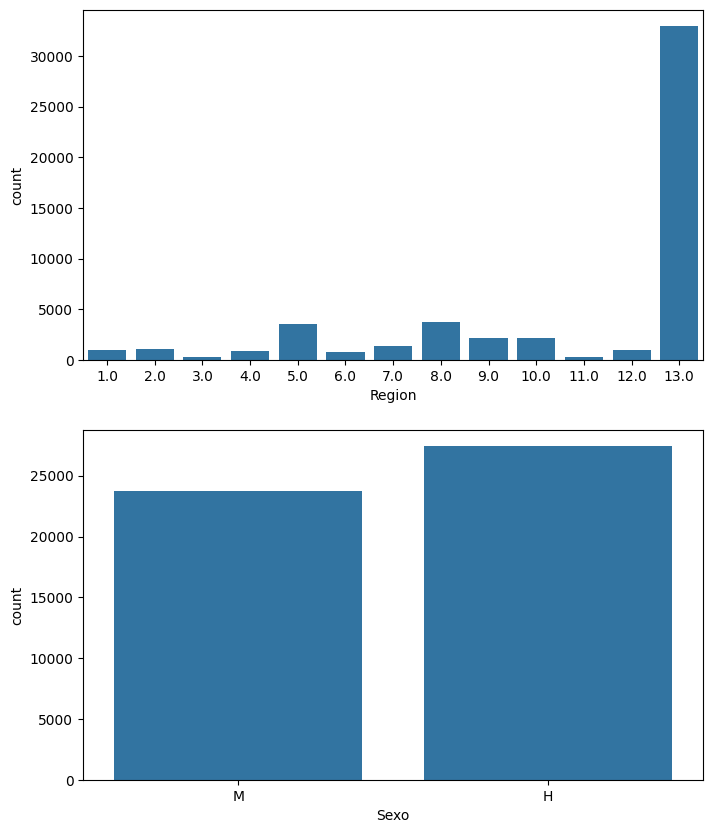

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

sns.countplot(x='Region', data=df_monopoly, ax=axes[0])
sns.countplot(x='Sexo', data=df_monopoly, ax=axes[1])


plt.show()

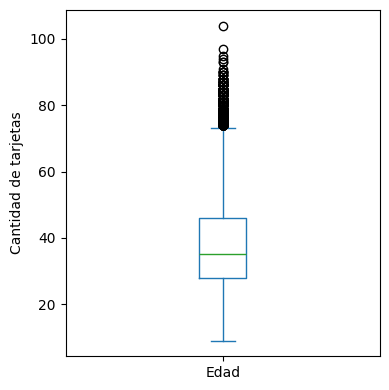

In [12]:
ax = (df_monopoly['Edad']).plot.box(figsize=(4, 4))
ax.set_ylabel('Cantidad de tarjetas')

plt.tight_layout()
plt.show()

En el gráfico a continuación podemos observar claramente como al pasar las 5 tarjetas de crédito se vuelve más dificil conseguir un cupo máximo alto.

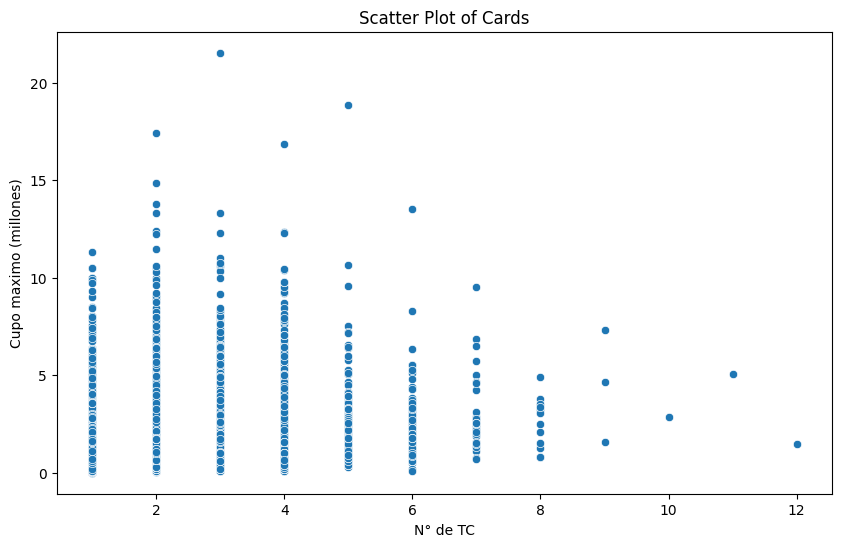

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TC', y=df_monopoly['CUPO_L1']/1000000, data=df)
plt.title('Scatter Plot of Cards')
plt.xlabel('N° de TC')
plt.ylabel('Cupo maximo (millones)')
plt.show()

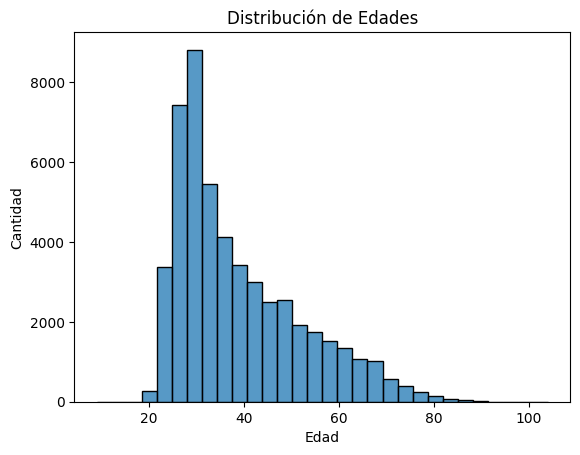

In [14]:
# Histograma de la variable Edad
sns.histplot(data=df_monopoly, x='Edad', bins=30)
plt.title('Distribución de Edades')
plt.ylabel('Cantidad')
plt.show()

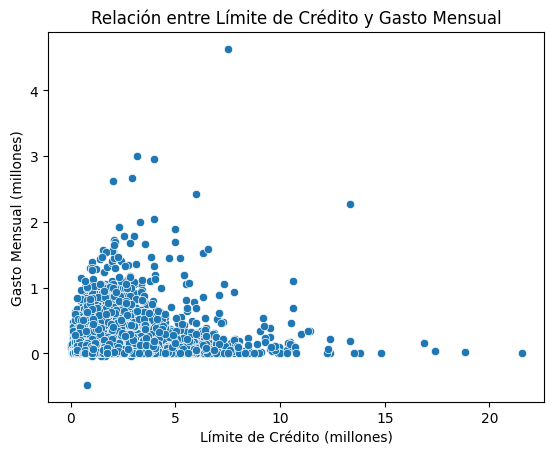

In [15]:
# Diagrama de dispersión entre límite de crédito y gasto mensual
sns.scatterplot(data=df_monopoly, x=df['CUPO_L1']/1000000, y=df['Fac_T12']/1000000)
plt.title('Relación entre Límite de Crédito y Gasto Mensual')
plt.xlabel('Límite de Crédito (millones)')
plt.ylabel('Gasto Mensual (millones)')
plt.show()

In [ ]:
sns.pairplot(data=df_monopoly,hue='Monoproducto')

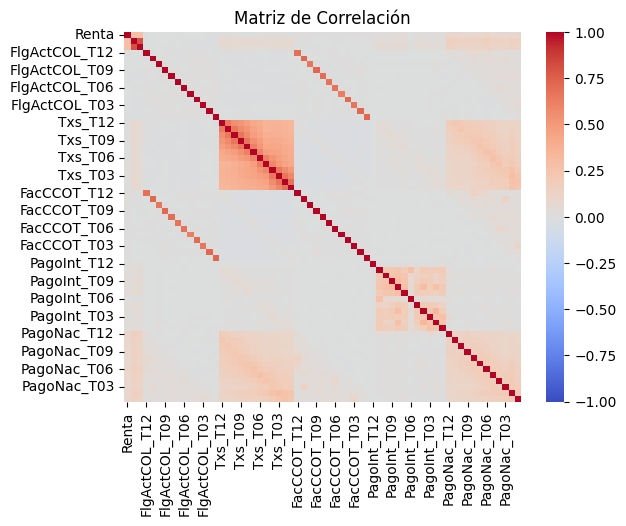

In [16]:
sns.heatmap(var_continuas.corr(), vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

<h2>Fase 3: Data Preparation</h2>

Creamos una copia de nuestro DataFrama en la cual podremos realizar todos los cambios necesarios, sin necesidad de poner en riesgo el original

In [17]:
df2 = df_monopoly.copy()
df2

,Region,Renta,Edad,Sexo,Adicional,Consumo,Cuentas,Monoproducto,TC,Dualidad,...,PagoNac_T10,PagoNac_T09,PagoNac_T08,PagoNac_T07,PagoNac_T06,PagoNac_T05,PagoNac_T04,PagoNac_T03,PagoNac_T02,PagoNac_T01
0,13.0,NaN,43,M,1,0,1,0,3,0,...,23000.0,24000.0,25000.0,26000.0,36000.0,50000.0,39000.0,41000.0,33000.0,33000
1,13.0,143640.0,46,H,0,0,1,0,1,0,...,194000.0,221000.0,180000.0,200000.0,100000.0,200000.0,200000.0,0.0,14000.0,300000
2,13.0,929106.0,45,H,1,0,1,0,2,0,...,14850.0,45890.0,0.0,60886.0,124289.0,69822.0,54138.0,0.0,25189.0,216676
3,13.0,172447.0,46,H,1,0,1,1,2,0,...,40000.0,60000.0,60000.0,45000.0,60000.0,50000.0,60000.0,60000.0,60000.0,60000
4,13.0,805250.0,46,H,1,0,2,0,3,1,...,301404.0,272969.0,435450.0,431776.0,386774.0,301860.0,246171.0,220811.0,143686.0,272925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,13.0,364978.0,51,H,1,0,2,0,3,1,...,80000.0,85000.0,0.0,80000.0,155000.0,0.0,83000.0,0.0,50000.0,300000
51120,13.0,625376.0,51,H,0,0,1,0,1,0,...,35454.0,45711.0,10336.0,0.0,346717.0,159171.0,76775.0,169661.0,173162.0,166098
51121,13.0,806220.0,47,H,1,0,1,0,2,0,...,10000.0,110298.0,0.0,0.0,13092.0,13123.0,17283.0,26700.0,14700.0,18891
51122,13.0,NaN,47,M,0,0,1,0,1,0,...,0.0,0.0,47510.0,42031.0,46256.0,35158.0,18959.0,61173.0,25460.0,26528


Vamos a usar KNN Imputer para asi los imputar datos similares o razonables en la logica del DataFrame a los datos nulos. Para esto tambien vamos a necestar transformar los datos String de "Sexo" y usaremos "drop_first" para evitar la multicolinealidad, para asi evitar el uso de recursos adicionales

In [18]:

# Inicializar el imputador KNN
imputer = KNNImputer(n_neighbors=5)

# Convertir variables categóricas a numéricas
df2_transf = pd.get_dummies(df2, drop_first=True)  # Usar drop_first para evitar la multicolinealidad


# Imputar los valores nulos
df2_imputer = imputer.fit_transform(df2_transf)

# Convertir el resultado de nuevo a un DataFrame
df2_imputer = pd.DataFrame(df2_imputer, columns=df2_transf.columns)

df2_imputer

,Region,Renta,Edad,Adicional,Consumo,Cuentas,Monoproducto,TC,Dualidad,CUPO_L1,...,PagoNac_T09,PagoNac_T08,PagoNac_T07,PagoNac_T06,PagoNac_T05,PagoNac_T04,PagoNac_T03,PagoNac_T02,PagoNac_T01,Sexo_M
0,13.0,521419.6,43.0,1.0,0.0,1.0,0.0,3.0,0.0,798000.0,...,24000.0,25000.0,26000.0,36000.0,50000.0,39000.0,41000.0,33000.0,33000.0,1.0
1,13.0,143640.0,46.0,0.0,0.0,1.0,0.0,1.0,0.0,750000.0,...,221000.0,180000.0,200000.0,100000.0,200000.0,200000.0,0.0,14000.0,300000.0,0.0
2,13.0,929106.0,45.0,1.0,0.0,1.0,0.0,2.0,0.0,1350000.0,...,45890.0,0.0,60886.0,124289.0,69822.0,54138.0,0.0,25189.0,216676.0,0.0
3,13.0,172447.0,46.0,1.0,0.0,1.0,1.0,2.0,0.0,1570800.0,...,60000.0,60000.0,45000.0,60000.0,50000.0,60000.0,60000.0,60000.0,60000.0,0.0
4,13.0,805250.0,46.0,1.0,0.0,2.0,0.0,3.0,1.0,2762000.0,...,272969.0,435450.0,431776.0,386774.0,301860.0,246171.0,220811.0,143686.0,272925.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,13.0,364978.0,51.0,1.0,0.0,2.0,0.0,3.0,1.0,999000.0,...,85000.0,0.0,80000.0,155000.0,0.0,83000.0,0.0,50000.0,300000.0,0.0
51120,13.0,625376.0,51.0,0.0,0.0,1.0,0.0,1.0,0.0,1744200.0,...,45711.0,10336.0,0.0,346717.0,159171.0,76775.0,169661.0,173162.0,166098.0,0.0
51121,13.0,806220.0,47.0,1.0,0.0,1.0,0.0,2.0,0.0,1061000.0,...,110298.0,0.0,0.0,13092.0,13123.0,17283.0,26700.0,14700.0,18891.0,0.0
51122,13.0,553916.2,47.0,0.0,0.0,1.0,0.0,1.0,0.0,1612000.0,...,0.0,47510.0,42031.0,46256.0,35158.0,18959.0,61173.0,25460.0,26528.0,1.0


In [20]:
df_clean = df_monopoly.copy()
var_norm = ['Renta', 'CUPO_L1', 'CUPO_MX', 'FlgActCOL_T12', 'FlgActCOL_T11', 'FlgActCOL_T10', 'FlgActCOL_T09', 'FlgActCOL_T08', 'FlgActCOL_T07', 'FlgActCOL_T06','FlgActCOL_T05','FlgActCOL_T04' ,'FlgActCOL_T03', 'FlgActCOL_T02', 'FlgActCOL_T01', 'Txs_T12', 'Txs_T11', 'Txs_T10', 'Txs_T09', 'Txs_T08', 'Txs_T07', 'Txs_T06', 'Txs_T05', 'Txs_T04', 'Txs_T03', 'Txs_T02', 'Txs_T01', 'FacCCOT_T12', 'FacCCOT_T11', 'FacCCOT_T10', 'FacCCOT_T09', 'FacCCOT_T08', 'FacCCOT_T07', 'FacCCOT_T06', 'FacCCOT_T05', 'FacCCOT_T04', 'FacCCOT_T03', 'FacCCOT_T02', 'FacCCOT_T01', 'PagoInt_T12', 'PagoInt_T11', 'PagoInt_T10', 'PagoInt_T09', 'PagoInt_T08', 'PagoInt_T07', 'PagoInt_T06', 'PagoInt_T05', 'PagoInt_T04', 'PagoInt_T03', 'PagoInt_T02', 'PagoInt_T01', 'PagoNac_T12', 'PagoNac_T11', 'PagoNac_T10', 'PagoNac_T09', 'PagoNac_T08', 'PagoNac_T07', 'PagoNac_T06', 'PagoNac_T05', 'PagoNac_T04', 'PagoNac_T03', 'PagoNac_T02', 'PagoNac_T01'] 
var_estand = ['Renta', 'CUPO_L1', 'CUPO_MX', 'FlgActCOL_T12', 'FlgActCOL_T11', 'FlgActCOL_T10', 'FlgActCOL_T09', 'FlgActCOL_T08', 'FlgActCOL_T07', 'FlgActCOL_T06','FlgActCOL_T05','FlgActCOL_T04' ,'FlgActCOL_T03', 'FlgActCOL_T02', 'FlgActCOL_T01', 'Txs_T12', 'Txs_T11', 'Txs_T10', 'Txs_T09', 'Txs_T08', 'Txs_T07', 'Txs_T06', 'Txs_T05', 'Txs_T04', 'Txs_T03', 'Txs_T02', 'Txs_T01', 'FacCCOT_T12', 'FacCCOT_T11', 'FacCCOT_T10', 'FacCCOT_T09', 'FacCCOT_T08', 'FacCCOT_T07', 'FacCCOT_T06', 'FacCCOT_T05', 'FacCCOT_T04', 'FacCCOT_T03', 'FacCCOT_T02', 'FacCCOT_T01', 'PagoInt_T12', 'PagoInt_T11', 'PagoInt_T10', 'PagoInt_T09', 'PagoInt_T08', 'PagoInt_T07', 'PagoInt_T06', 'PagoInt_T05', 'PagoInt_T04', 'PagoInt_T03', 'PagoInt_T02', 'PagoInt_T01', 'PagoNac_T12', 'PagoNac_T11', 'PagoNac_T10', 'PagoNac_T09', 'PagoNac_T08', 'PagoNac_T07', 'PagoNac_T06', 'PagoNac_T05', 'PagoNac_T04', 'PagoNac_T03', 'PagoNac_T02', 'PagoNac_T01']

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler_nor = MinMaxScaler()

df_clean[var_norm] = scaler_nor.fit_transform(df_monopoly[var_norm])
df_clean



,Region,Renta,Edad,Sexo,Adicional,Consumo,Cuentas,Monoproducto,TC,Dualidad,...,PagoNac_T10,PagoNac_T09,PagoNac_T08,PagoNac_T07,PagoNac_T06,PagoNac_T05,PagoNac_T04,PagoNac_T03,PagoNac_T02,PagoNac_T01
0,13.0,NaN,43,M,1,0,1,0,3,0,...,0.004586,0.002145,0.002931,0.003137,0.005495,0.010600,0.006129,0.004020,0.008436,0.003794
1,13.0,0.010974,46,H,0,0,1,0,1,0,...,0.038680,0.019755,0.021101,0.024129,0.015264,0.042400,0.031430,0.000000,0.003579,0.034492
2,13.0,0.070982,45,H,1,0,1,0,2,0,...,0.002961,0.004102,0.000000,0.007346,0.018971,0.014802,0.008508,0.000000,0.006439,0.024912
3,13.0,0.013175,46,H,1,0,1,1,2,0,...,0.007975,0.005363,0.007034,0.005429,0.009158,0.010600,0.009429,0.005882,0.015337,0.006898
4,13.0,0.061520,46,H,1,0,2,0,3,1,...,0.060094,0.024400,0.051047,0.052092,0.059036,0.063994,0.038686,0.021648,0.036730,0.031379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,13.0,0.027884,51,H,1,0,2,0,3,1,...,0.015951,0.007598,0.000000,0.009652,0.023659,0.000000,0.013043,0.000000,0.012781,0.034492
51120,13.0,0.047777,51,H,0,0,1,0,1,0,...,0.007069,0.004086,0.001212,0.000000,0.052922,0.033744,0.012065,0.016633,0.044264,0.019097
51121,13.0,0.061594,47,H,1,0,1,0,2,0,...,0.001994,0.009859,0.000000,0.000000,0.001998,0.002782,0.002716,0.002618,0.003758,0.002172
51122,13.0,NaN,47,M,0,0,1,0,1,0,...,0.000000,0.000000,0.005570,0.005071,0.007060,0.007453,0.002979,0.005997,0.006508,0.003050


In [17]:
scaler_est = StandardScaler()

df_scaled = scaler_est.fit_transform(df_monopoly[var_estand])

df_clean[var_estand] = df_scaled 

df_clean

,Region,Renta,Edad,Sexo,Adicional,Consumo,Cuentas,Monoproducto,TC,Dualidad,...,PagoNac_T10,PagoNac_T09,PagoNac_T08,PagoNac_T07,PagoNac_T06,PagoNac_T05,PagoNac_T04,PagoNac_T03,PagoNac_T02,PagoNac_T01
0,13.0,NaN,43,M,1,0,1,0,3,0,...,-0.283243,-0.280240,-0.280086,-0.280102,-0.254386,-0.126409,-0.250284,-0.192329,-0.322133,-0.291064
1,13.0,-1.269167,46,H,0,0,1,0,1,0,...,0.838269,0.964377,0.761824,0.906196,0.186179,1.000404,0.822798,-0.468450,-0.455002,1.500592
2,13.0,0.650002,45,H,1,0,1,0,2,0,...,-0.336695,-0.141942,-0.448136,-0.042256,0.353380,0.022496,-0.149388,-0.468450,-0.376756,0.941461
3,13.0,-1.198781,46,H,1,0,1,1,2,0,...,-0.171748,-0.052797,-0.044816,-0.150564,-0.089174,-0.126409,-0.110317,-0.064370,-0.133319,-0.109885
4,13.0,0.347378,46,H,1,0,2,0,3,1,...,1.542684,1.292709,2.478959,2.486399,2.160279,1.765585,1.130532,1.018638,0.451906,1.318910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,13.0,-0.728361,51,H,1,0,2,0,3,1,...,0.090594,0.105149,-0.448136,0.088059,0.564789,-0.502013,0.042981,-0.468450,-0.203250,1.500592
51120,13.0,-0.092117,51,H,0,0,1,0,1,0,...,-0.201563,-0.143073,-0.378657,-0.457365,1.884534,0.693693,0.001490,0.674160,0.658035,0.602067
51121,13.0,0.349748,47,H,1,0,1,0,2,0,...,-0.368504,0.264978,-0.448136,-0.457365,-0.412080,-0.403432,-0.395030,-0.288635,-0.450107,-0.385740
51122,13.0,NaN,47,M,0,0,1,0,1,0,...,-0.434090,-0.431868,-0.128774,-0.170806,-0.183785,-0.237903,-0.383859,-0.056471,-0.374861,-0.334493
